In [1]:
import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
%matplotlib inline

from entities import CoachingPracticeFinance, ExpenseLineItem, HoursLineItem

practice = CoachingPracticeFinance.load()

In [2]:
rows = []
for ta in practice.transaction_agreements:
    ta_range = pd.bdate_range(ta.start_date, ta.end_date, freq="C", holidays=practice.statutory_holiday_list)
    for date in ta_range:
        ta_dict = ta.__dict__.copy()
        ta_dict["rate"] = float(ta.rate.root)
        ta_dict["date"] = date
        ta_dict["hours"] = float(practice.standard_hours_per_day)
        rows.append(ta_dict)

ta_frame = pd.DataFrame(rows)
ta_frame["amount"] = ta_frame.rate * ta_frame.hours
ta_frame["month"] = ta_frame.date.dt.month
ta_frame

,number,contractor_code,hours,rate,start_date,end_date,date,amount,month
0,ILC-2021-01,338191463,7.5,225.0,2023-05-01,2023-06-29,2023-05-01,1687.5,5
1,ILC-2021-01,338191463,7.5,225.0,2023-05-01,2023-06-29,2023-05-02,1687.5,5
2,ILC-2021-01,338191463,7.5,225.0,2023-05-01,2023-06-29,2023-05-03,1687.5,5
3,ILC-2021-01,338191463,7.5,225.0,2023-05-01,2023-06-29,2023-05-04,1687.5,5
4,ILC-2021-01,338191463,7.5,225.0,2023-05-01,2023-06-29,2023-05-05,1687.5,5
...,...,...,...,...,...,...,...,...,...
659,ILC-2021-02,265846691,7.5,275.0,2023-11-01,2024-10-31,2024-10-25,2062.5,10
660,ILC-2021-02,265846691,7.5,275.0,2023-11-01,2024-10-31,2024-10-28,2062.5,10
661,ILC-2021-02,265846691,7.5,275.0,2023-11-01,2024-10-31,2024-10-29,2062.5,10
662,ILC-2021-02,265846691,7.5,275.0,2023-11-01,2024-10-31,2024-10-30,2062.5,10


<Axes: xlabel='date'>

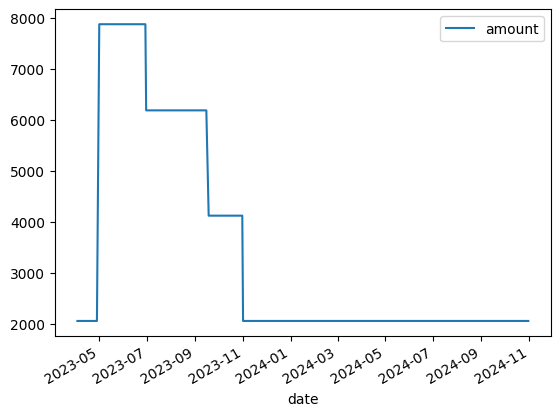

In [3]:
ta_frame[["date", "amount"]].groupby("date").sum().plot()

In [4]:
fiscal_year_range = pd.date_range("2023-11-01", "2024-10-31")
fiscal_year_range

DatetimeIndex(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-04',
               '2023-11-05', '2023-11-06', '2023-11-07', '2023-11-08',
               '2023-11-09', '2023-11-10',
               ...
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-26', '2024-10-27', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31'],
              dtype='datetime64[ns]', length=366, freq='D')

<Axes: xlabel='month'>

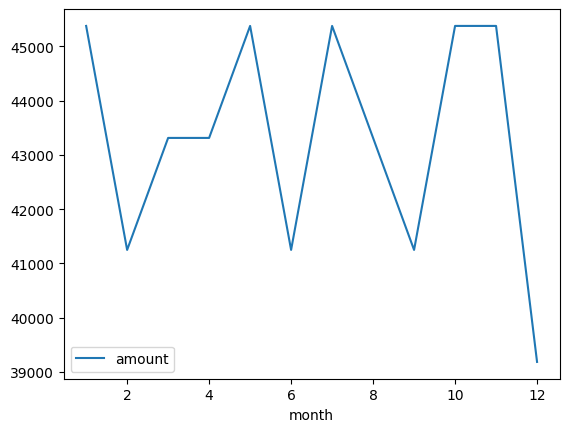

In [5]:
# Filter out all the rows that are not in the fiscal year
ta_frame = ta_frame[ta_frame.date.isin(fiscal_year_range)]
ta_frame[["date", "amount", "month"]].groupby(["month"]).sum("amount").plot()
# ta_frame

In [6]:
# get the sum of the amount column in the ta_frame
ta_frame.amount.sum()

519750.0

In [7]:
# Let's get the actuals by day out of the invoice data
rows = []
for consultancy in practice.consultancies:
    for invoice in consultancy.invoices:
        for line_item in invoice.line_items:
            line_item_dict = line_item.model_dump()
            line_item_dict["type"] = line_item.__class__.__name__
            line_item_dict["amount"] = float(line_item.amount.root)
            if line_item_dict["type"] == ExpenseLineItem.__name__:
                line_item_dict["date"] = pd.Timestamp(invoice.period_start)
                rows.append(line_item_dict)
            else:
                hours_range = pd.bdate_range(invoice.period_start, invoice.period_end, freq="C", holidays=practice.statutory_holiday_list)
                days = len(hours_range)
                daily_hours = line_item_dict["hours"] / days
                daily_amount = line_item_dict["amount"] / days
                for date in hours_range:
                    dated_dict = line_item_dict.copy()
                    dated_dict["date"] = date
                    dated_dict["amount"] = daily_amount
                    dated_dict["hours"] = daily_hours
                    rows.append(dated_dict)
# rows
actuals_frame = pd.DataFrame(rows)
actuals_frame["month"] = actuals_frame.date.dt.month
actuals_frame

,description,amount,contractor_code,taxable,hours,tag,type,date,month
0,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-15,6
1,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-16,6
2,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-19,6
3,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-20,6
4,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-21,6
5,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-22,6
6,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-23,6
7,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-26,6
8,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-27,6
9,Coaching Hours,2142.857143,267298982,True,4.761905,Hours,HoursLineItem,2023-06-28,6


In [8]:
merged = ta_frame[["date", "amount", "month"]].merge(actuals_frame[["date", "amount"]], on="date", how='outer')
merged.columns = ["date", "budget", "month", "actual"]
merged["actual"] = merged["actual"].fillna(0)
report = merged[["month","budget", "actual"]].groupby("month").sum()
# report.plot()
report

,budget,actual
month,,
1.0,45375.0,0.0
2.0,41250.0,0.0
3.0,43312.5,0.0
4.0,43312.5,0.0
5.0,45375.0,0.0
6.0,41250.0,0.0
7.0,45375.0,0.0
8.0,43312.5,0.0
9.0,41250.0,0.0


In [9]:
report.budget.sum()

519750.0

In [10]:
report.actual.sum()

0.0

In [25]:
contractor_expenses = []
for consultancy in practice.consultancies:
    for invoice in consultancy.invoices:
        for line_item in invoice.line_items:
            if line_item.__class__.__name__ == HoursLineItem.__name__:
                for contractor in practice.contractors:
                    if contractor.code == line_item.contractor_code:
                        contractor_expenses.append([consultancy.name, invoice.number, invoice.issue_date, contractor.code, contractor.name, line_item.amount])
df = pd.DataFrame(contractor_expenses, columns=["Consultancy", "Invoice", "Date", "RBCID", "Contractor", "Amount"])
df['month'] = pd.DatetimeIndex(df['Date']).month
contractor_actuals = df.groupby(["month","RBCID"], sort=False).agg({
    "Consultancy": "first",
    "RBCID": "first",
    "Contractor": "first",
    "Amount": "sum"
})
contractor_actuals

,,Consultancy,RBCID,Contractor,Amount
month,RBCID,,,,
6,267298982,Industrial Logic Canada,267298982,John Borys,"$45,000.00"


In [26]:
df.set_index("RBCID").groupby(["month"]).sum()

,Consultancy,Invoice,Date,Contractor,Amount
month,,,,,
6,Industrial Logic Canada,12345,2023-06-27,John Borys,"$45,000.00"


In [27]:
df.set_index(["month", "RBCID"]).groupby(["month", "RBCID"]).sum()

,,Consultancy,Invoice,Date,Contractor,Amount
month,RBCID,,,,,
6,267298982,Industrial Logic Canada,12345,2023-06-27,John Borys,"$45,000.00"


In [31]:
df.set_index(["month", "RBCID"]).groupby(["month", "RBCID"]).sum().stack()

month  RBCID                 
6      267298982  Consultancy    Industrial Logic Canada
                  Invoice                          12345
                  Date                        2023-06-27
                  Contractor                  John Borys
                  Amount                      $45,000.00
dtype: object

In [32]:
contractor_expenses = []
for consultancy in practice.consultancies:
    for invoice in consultancy.invoices:
        for line_item in invoice.line_items:
            if line_item.__class__.__name__ == HoursLineItem.__name__:
                for contractor in practice.contractors:
                    if contractor.code == line_item.contractor_code:
                        contractor_expenses.append([consultancy.name, invoice.number, invoice.issue_date, contractor.code, contractor.name, line_item.amount])
df = pd.DataFrame(contractor_expenses, columns=["Consultancy", "Invoice", "Date", "RBCID", "Contractor", "Amount"])
df['month'] = pd.DatetimeIndex(df['Date']).month
df

,Consultancy,Invoice,Date,RBCID,Contractor,Amount,month
0,Industrial Logic Canada,12345,2023-06-27,267298982,John Borys,"$45,000.00",6
